# Introduction to dealing with graphs in R

We use `igraph`. This is a very good package, which moreover also has `Python` and `C` versions, as well as a `Mathematica` interface. See [here](https://igraph.org/). In particular, `igraph` also has good online documentation, accessible from [this top page](https://igraph.org/r/html/latest/).

We start by installing the library (once it is, comment out the first line). This should take a while. Then we load the library.

In [2]:
#install.packages("igraph")
library(igraph)

Some basic information on the library can be found [here](https://igraph.org/r/html/1.2.7/aaa-igraph-package.html). 

## Creating graphs
`igraph` allows for many different methods for creating graphs, we will review some of them now in no specific order.

You can create graphs from the "usual" type of specification.

- `graph_from_adjacency_matrix`	Create graphs from adjacency matrices
- `graph_from_adj_list`	Create graphs from adjacency lists
- `graph_from_atlas`	Create a graph from the Graph Atlas
- `graph_from_data_frame`	Creating igraph graphs from data frames or vice-versa
- `graph_from_edgelist`	Create a graph from an edge list matrix
- `graph_from_graphdb`	Load a graph from the graph database for testing graph isomorphism.
- `graph_from_graphnel`	Convert graphNEL objects from the graph package to igraph
- `graph_from_incidence_matrix`	Create graphs from an incidence matrix
- `graph_from_isomorphism_class`	Create a graph from an isomorphism class
- `graph_from_lcf`	Creating a graph from LCF notation
- `graph_from_literal`	Creating (small) graphs via a simple interface

You can also create graphs of prescribed types.

- `graph.empty`	A graph with no edges
- `graph.extended.chordal.ring`	Create an extended chordal ring graph
- `graph.famous`	Create an igraph graph from a list of edges, or a notable graph
- `graph.formula`	Creating (small) graphs via a simple interface
- `graph.full`	Create a full graph
- `graph.full.bipartite`	Create a full bipartite graph
- `graph.full.citation`	Create a complete (full) citation graph
- `make_`	Make a new graph
- `make_bipartite_graph`	Create a bipartite graph
- `make_chordal_ring`	Create an extended chordal ring graph
- `make_clusters`	Creates a communities object.
- `make_de_bruijn_graph`	De Bruijn graphs
- `make_directed_graph`	Create an igraph graph from a list of edges, or a notable graph
- `make_ego_graph`	Neighborhood of graph vertices
- `make_empty_graph`	A graph with no edges
- `make_full_bipartite_graph`	Create a full bipartite graph
- `make_full_citation_graph`	Create a complete (full) citation graph
- `make_full_graph`	Create a full graph
- `make_graph`	Create an igraph graph from a list of edges, or a notable graph
- `make_kautz_graph`	Kautz graphs
- `make_lattice`	Create a lattice graph
- `make_line_graph`	Line graph of a graph
- `make_ring`	Create a ring graph
- `make_star`	Create a star graph, a tree with n vertices and n - 1 leaves
- `make_tree`	Create tree graphs
- `make_undirected_graph`	Create an igraph graph from a list of edges, or a notable graph

There is a whole bestiary of random graph models.

- `sample_`	Sample from a random graph model
- `sample_asym_pref`	Trait-based random generation
- `sample_bipartite`	Bipartite random graphs
- `sample_cit_cit_types`	Random citation graphs
- `sample_cit_types`	Random citation graphs
- `sample_correlated_gnp`	Generate a new random graph from a given graph by randomly adding/removing edges
- `sample_correlated_gnp_pair`	Sample a pair of correlated G(n,p) random graphs
- `sample_degseq`	Generate random graphs with a given degree sequence
- `sample_dirichlet`	Sample from a Dirichlet distribution
- `sample_dot_product`	Generate random graphs according to the random dot product graph model
- `sample_fitness`	Random graphs from vertex fitness scores
- `sample_fitness_pl`	Scale-free random graphs, from vertex fitness scores
- `sample_forestfire`	Forest Fire Network Model
- `sample_gnm`	Generate random graphs according to the G(n,m) Erdos-Renyi model
- `sample_gnp`	Generate random graphs according to the G(n,p) Erdos-Renyi model
- `sample_grg`	Geometric random graphs
- `sample_growing`	Growing random graph generation
- `sample_hierarchical_sbm`	Sample the hierarchical stochastic block model
- `sample_hrg`	Sample from a hierarchical random graph model
- `sample_islands`	A graph with subgraphs that are each a random graph.
- `sample_k_regular`	Create a random regular graph
- `sample_last_cit`	Random citation graphs
- `sample_motifs`	Graph motifs
- `sample_pa`	Generate scale-free graphs according to the Barabasi-Albert model
- `sample_pa_age`	Generate an evolving random graph with preferential attachment and aging
- `sample_pref`	Trait-based random generation
- `sample_sbm`	Sample stochastic block model
- `sample_seq`	Sampling a random integer sequence
- `sample_smallworld`	The Watts-Strogatz small-world model
- `sample_sphere_surface`	Sample vectors uniformly from the surface of a sphere
- `sample_sphere_volume`	Sample vectors uniformly from the volume of a sphere
- `sample_traits`	Graph generation based on different vertex types
- `sample_traits_callaway`	Graph generation based on different vertex types

You can also read "foreign" graph formats such as Pajek using `read_graph`.

Let us work through a few examples. To start with, the graph whose matrix I wrote up at the end of the video lecture (Lecture 12 part 1).

In [3]:
M = matrix(c(0,1,0,1,0,1,0,0,0), nr = 3, byrow = TRUE)
M

0,1,0
1,0,1
0,0,0


IGRAPH 983f3ce D--- 3 3 -- 
+ edges from 983f3ce:
[1] 1->2 2->1 2->3

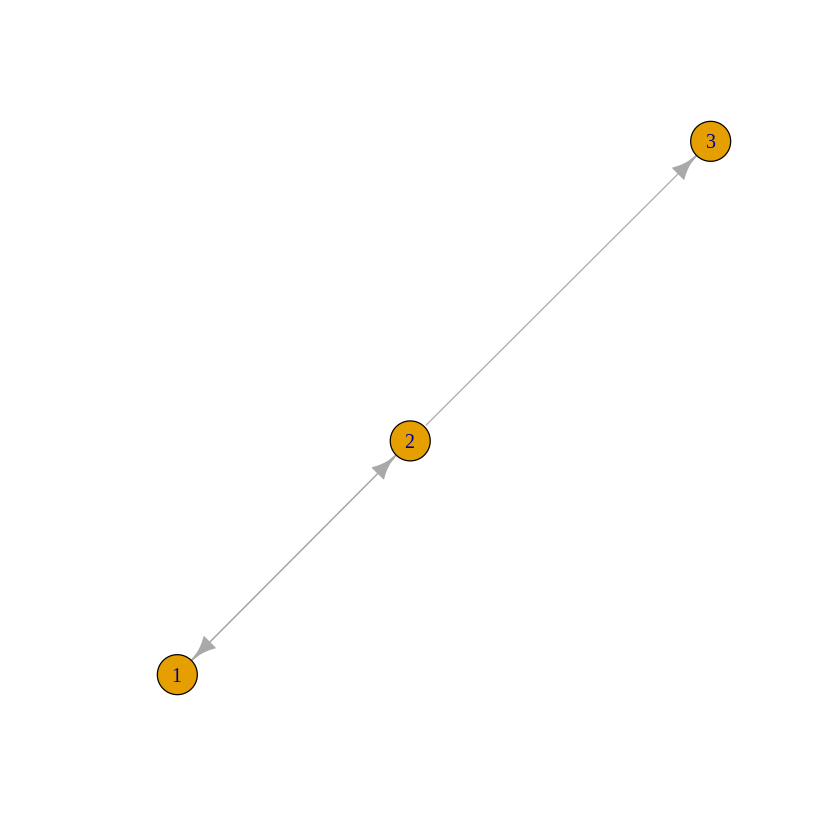

In [4]:
G = graph_from_adjacency_matrix(M)
G
plot(G)

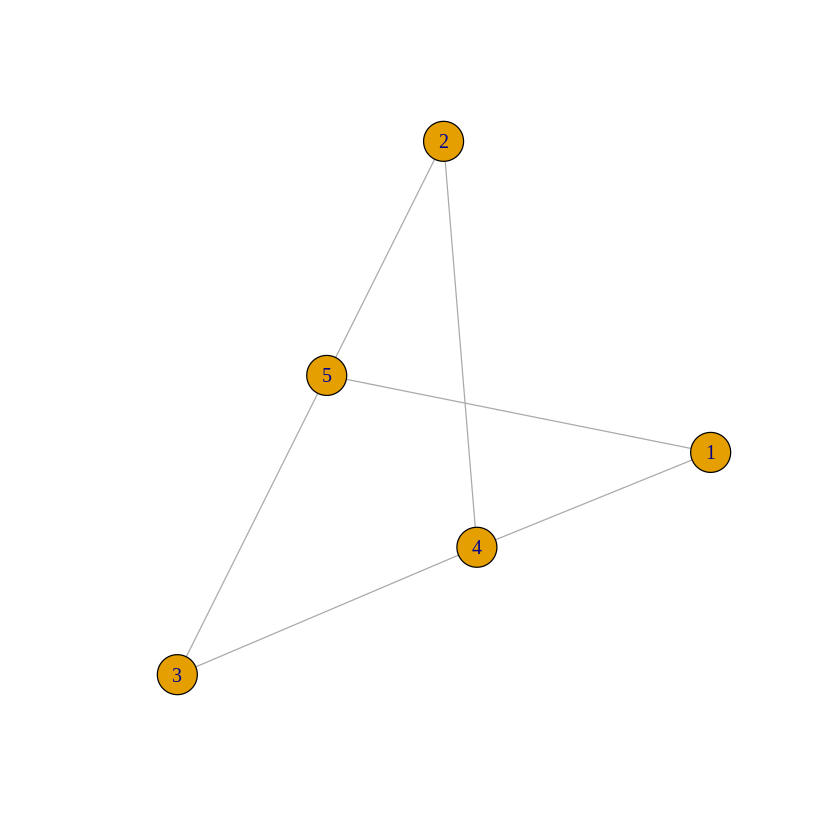

In [5]:
G = graph.full.bipartite(n1 = 3, n2 = 2)
plot(G)

For most graph types, we can specify whether the graph is directed or not. By default, usually, the graph is undirected.

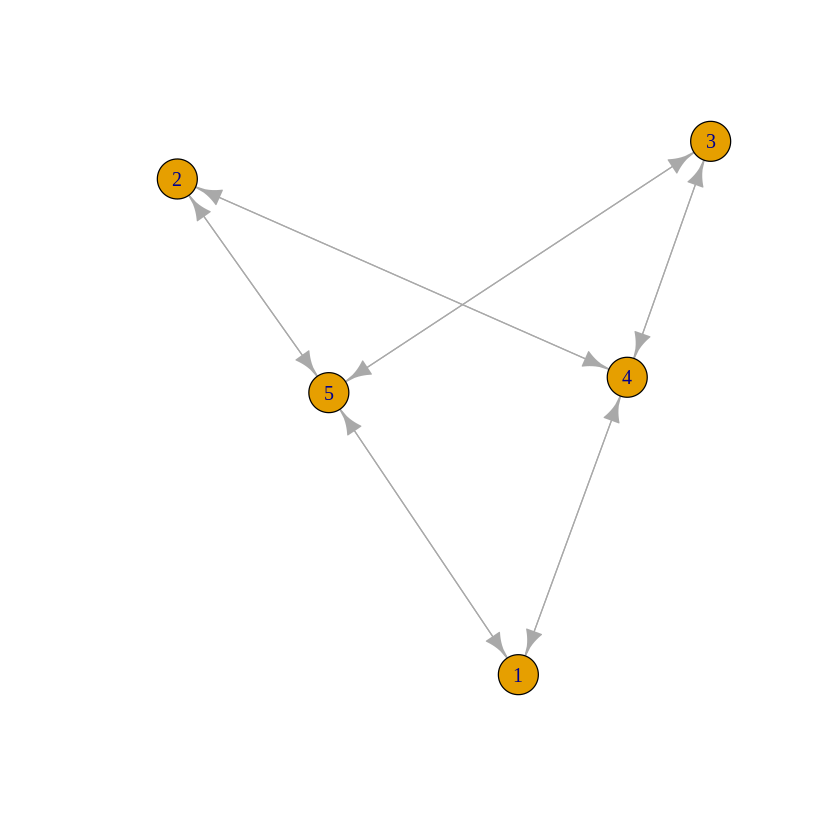

In [6]:
G = graph.full.bipartite(n1 = 3, n2 = 2, directed = TRUE)
plot(G)

Some platonic solids.

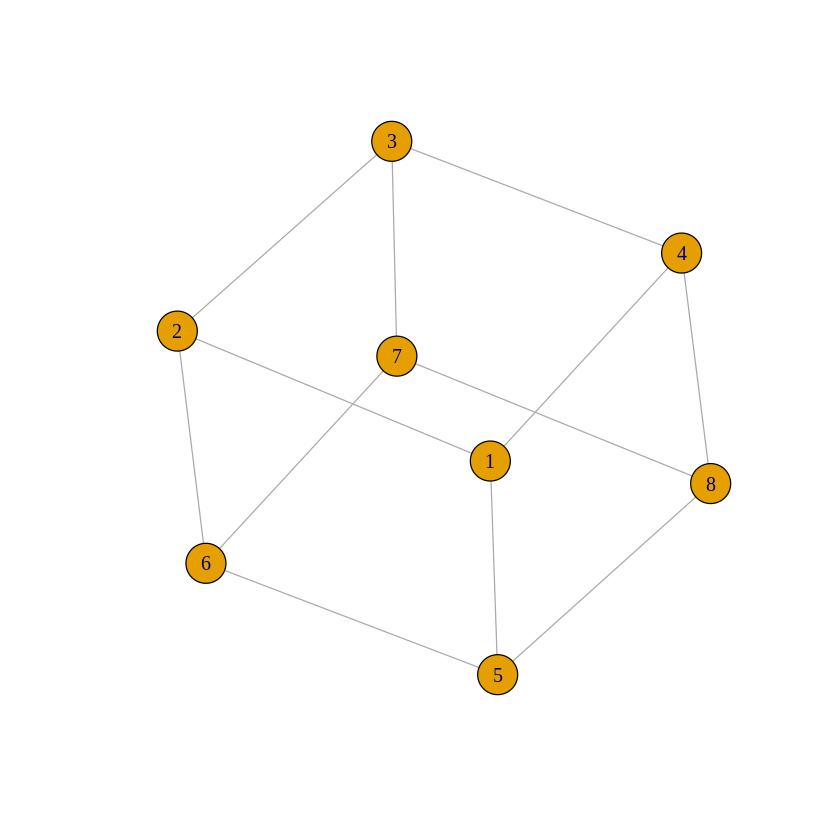

In [9]:
solids <- list(make_graph("Tetrahedron"),
               make_graph("Cubical"),
               make_graph("Octahedron"),
               make_graph("Dodecahedron"),
               make_graph("Icosahedron"))
plot(solids[[2]])

Another very popular graph, this time for real world applications: a **small world** network. We will look at this network in more details later, I will explain the parameters then.

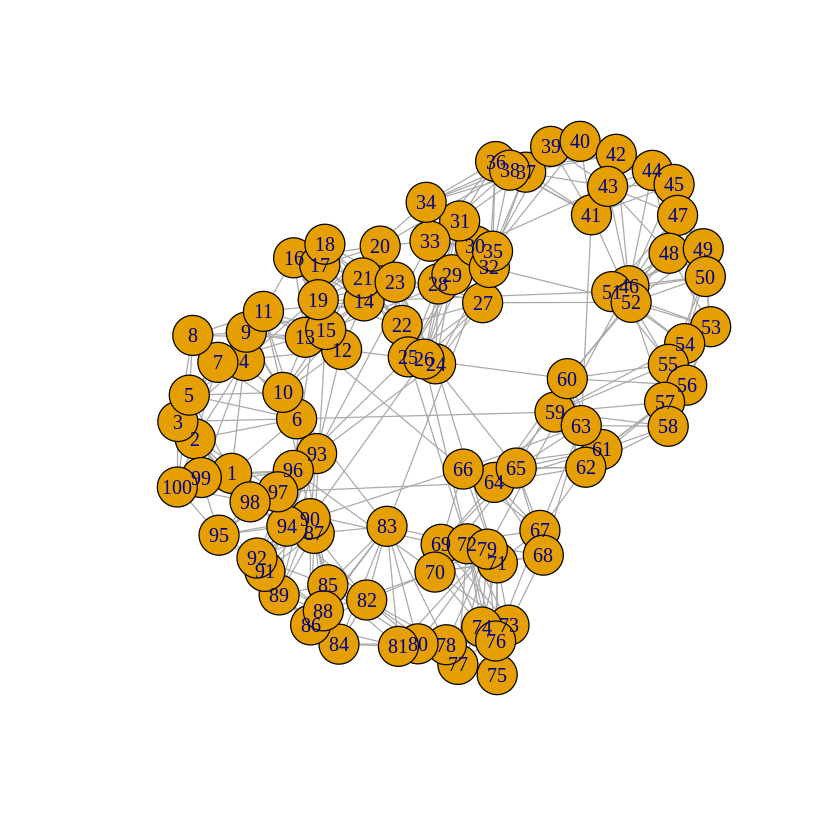

In [11]:
G <- sample_smallworld(dim = 1, size = 100, nei = 5, p = 0.05)
plot(G)

Another type of graph popular in applications: scale-free networks.

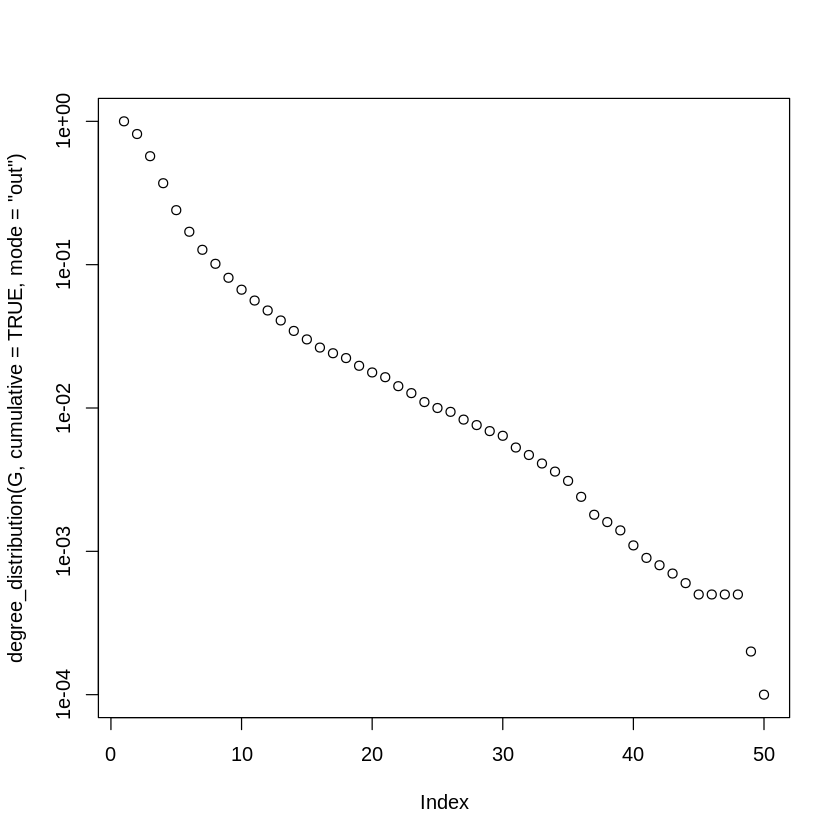

In [14]:
G <- sample_fitness_pl(no.of.nodes = 10000, 
                       no.of.edges = 30000, 
                       exponent.out = 2.2, 
                       exponent.in = 2.3)
plot(degree_distribution(G, cumulative=TRUE, mode="out"), log="xy")

## Some useful functions 
Let us look at some functions that will be useful throughout. Let us take for example an Erdos-Renyi graph, in which we have $n=50$ vertices and $m=100$ arcs. We take the graph to be directed and also allow loops.

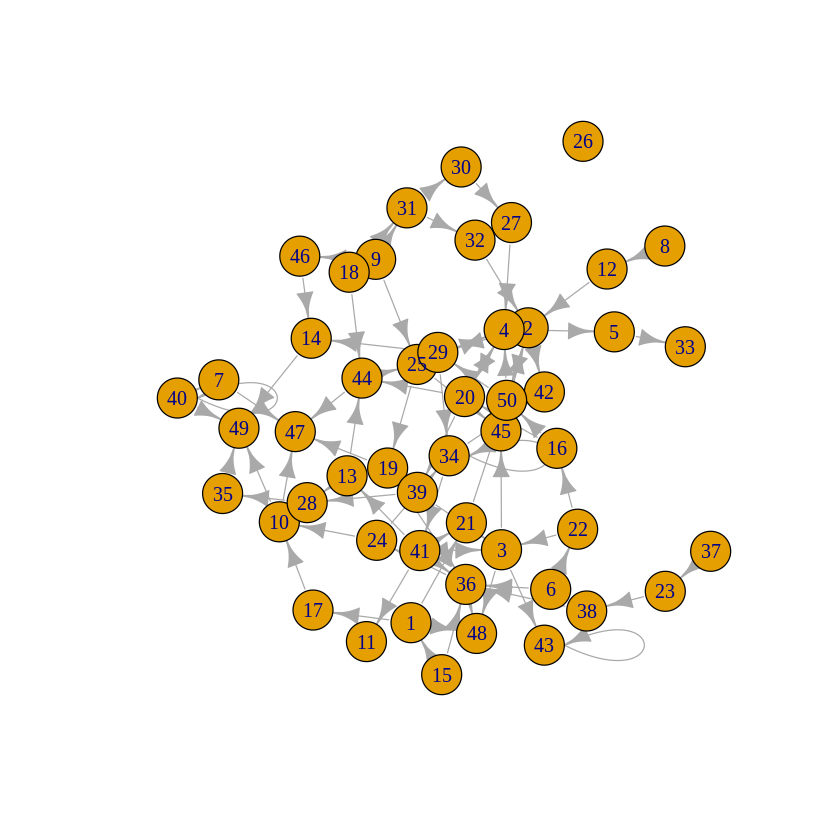

In [15]:
G = sample_gnm(n = 50, m = 80, directed = TRUE, loops = TRUE)
plot(G)

The order of the graph is easy to obtain.

In [16]:
gorder(G)

[1] 50

To get the adjacency matrix, proceed as follows.

In [17]:
M = as_adjacency_matrix(G)
M

50 x 50 sparse Matrix of class "dgCMatrix"
                                                                               
 [1,] . . . . . . . . . . . . . . . . 1 . . . 1 . . . . . . . . . . . . . . . .
 [2,] . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . .
 [3,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
 [4,] . . . . 1 . . . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . .
 [5,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . .
 [6,] . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . . . . . . . 1 .
 [7,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
 [8,] . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . .
 [9,] . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . 1 . . . . . .
[10,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
[11,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Look for connected components.

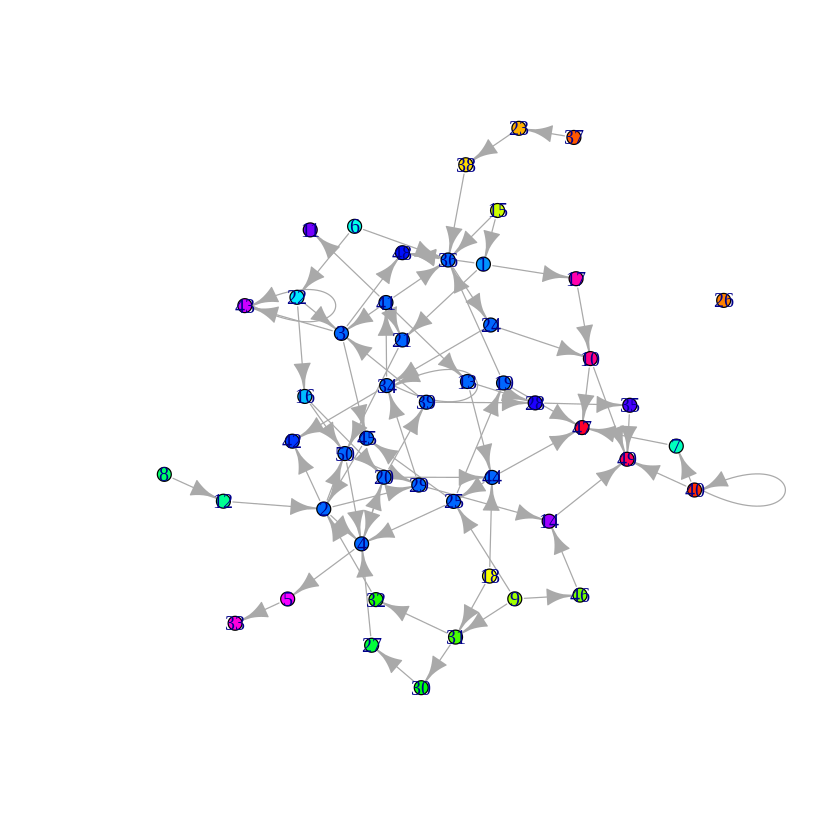

In [18]:
comps <- components(G, mode = "strong")$membership
colbar <- rainbow(max(comps)+1)
V(G)$color <- colbar[comps+1]
plot(G, vertex.size = 5, layout=layout_nicely)

Some functions to test properties we have discussed this far.

In [19]:
is.directed(G)
is.connected(G)
is.bipartite(G)
is.simple(G)
# Are there multiple arrows?
any_multiple(G)
# Any loops?
is.loop(G)

[1] TRUE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

Just to see how things change when we consider the unidrected case..

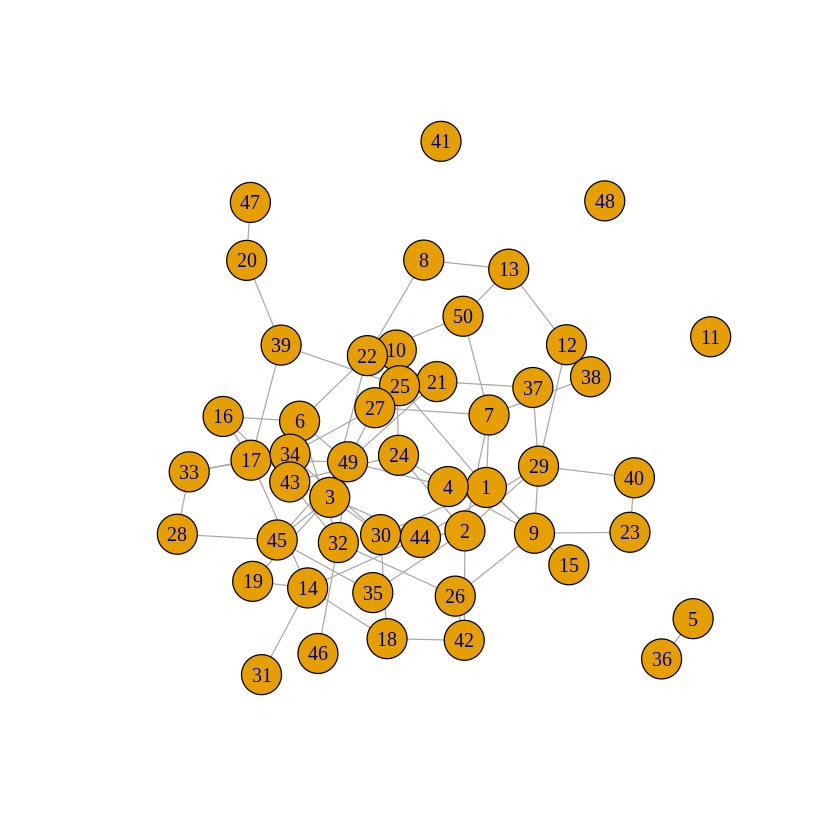

In [20]:
G = sample_gnm(n = 50, m = 80)
plot(G)

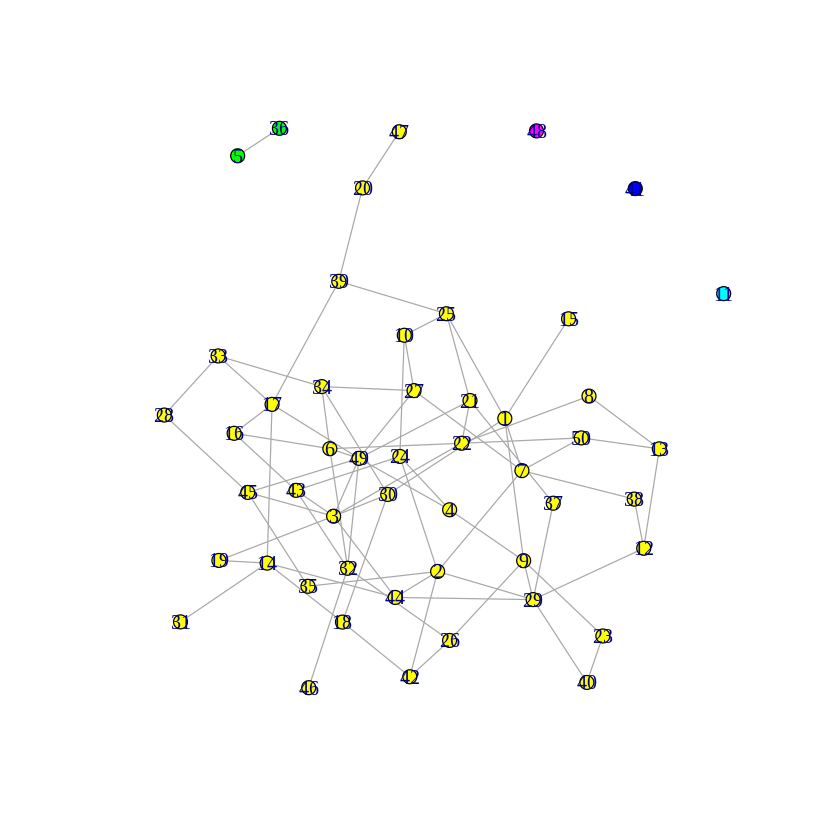

In [21]:
comps <- components(G)$membership
colbar <- rainbow(max(comps)+1)
V(G)$color <- colbar[comps+1]
plot(G, vertex.size = 5, layout=layout_nicely)

In [22]:
is.directed(G)
is.connected(G)
is.bipartite(G)
is.simple(G)
# Are there multiple arrows?
any_multiple(G)
# Any loops?
is.loop(G)

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE